In [1]:
pip install pycaret

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: beautifulsoup4 in c:\users\fatma\anaconda3\lib\site-packages (from nbconvert->notebook>=4.4.1->widgetsnbextension~=3.5.0->ipywidgets>=7.6.5->pycaret) (4.11.1)



In [2]:
from pycaret.regression import *

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")

In [4]:
df=pd.read_csv("House_Rent_Dataset.csv")

In [5]:
df

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [6]:
df.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [8]:
df.shape

(4746, 12)

In [9]:
df['Posted On']=pd.to_datetime(df['Posted On'])

df['Year']=df['Posted On'].dt.year
df['Month']=df['Posted On'].dt.month
df['Weekday']=df['Posted On'].dt.dayofweek
df['Month_Name']=df['Posted On'].dt.month_name()
df['Weekday_Name']=df['Posted On'].dt.day_name()

df=df.drop('Posted On',axis=1) 

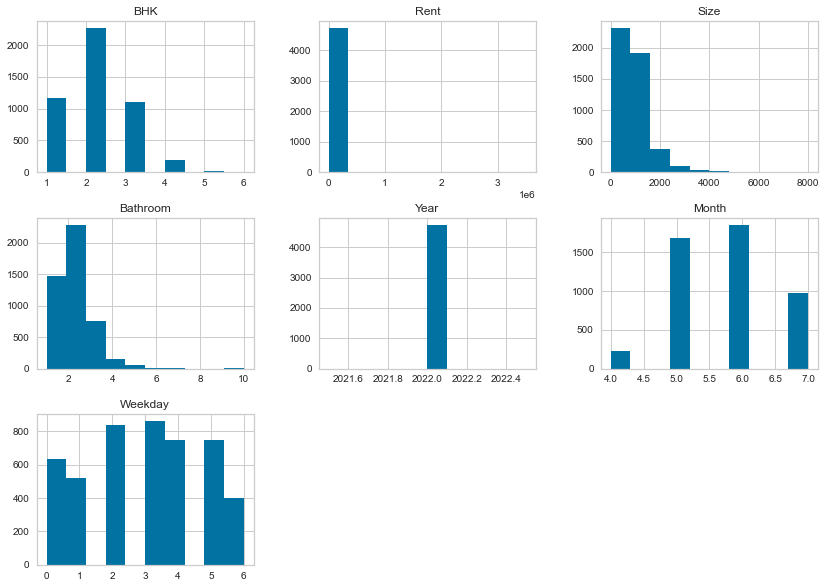

In [10]:
df.hist(bins = 10 , figsize= (14,10))
plt.show();

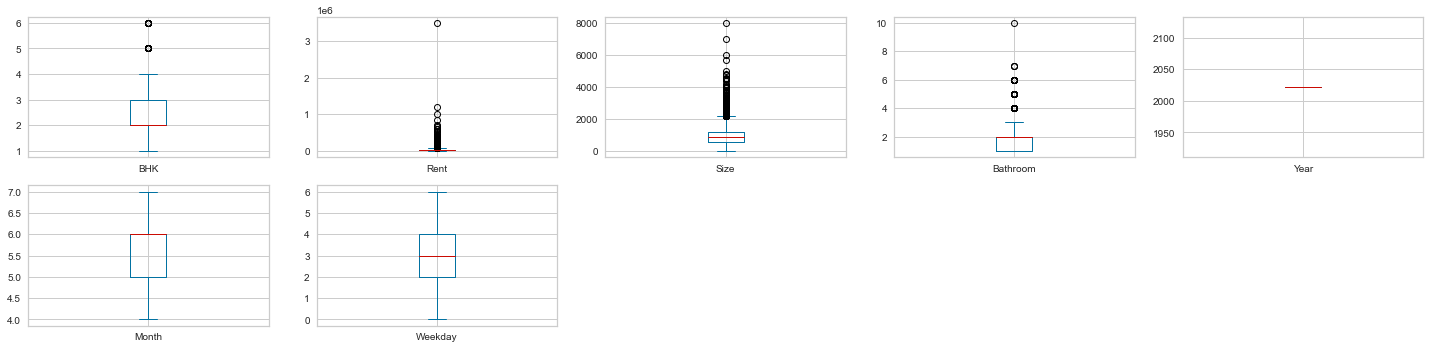

In [11]:
df.plot(kind = "box" , subplots = True , figsize = (25,15) , layout = (5,5));

In [12]:
df['BHK'].value_counts()

2    2265
1    1167
3    1098
4     189
5      19
6       8
Name: BHK, dtype: int64

In [13]:
df['Size'].value_counts()

1000    240
600     225
800     220
1200    193
500     192
       ... 
2770      1
1252      1
904       1
721       1
855       1
Name: Size, Length: 615, dtype: int64

In [14]:
df['Floor'].value_counts()

1 out of 2         379
Ground out of 2    350
2 out of 3         312
2 out of 4         308
1 out of 3         293
                  ... 
11 out of 31         1
50 out of 75         1
18 out of 26         1
12 out of 27         1
23 out of 34         1
Name: Floor, Length: 480, dtype: int64

In [15]:
df['Area Type'].value_counts()

Super Area     2446
Carpet Area    2298
Built Area        2
Name: Area Type, dtype: int64

In [16]:
df['Area Locality'].value_counts()

Bandra West                                37
Gachibowli                                 29
Electronic City                            24
Velachery                                  22
Miyapur, NH 9                              22
                                           ..
Kengeri Upanagara                           1
Ittamadu, Banashankari, Outer Ring Road     1
Rmv Extension, Armane Nagar                 1
snv la                                      1
Manikonda, Hyderabad                        1
Name: Area Locality, Length: 2235, dtype: int64

In [17]:
df['City'].value_counts()

Mumbai       972
Chennai      891
Bangalore    886
Hyderabad    868
Delhi        605
Kolkata      524
Name: City, dtype: int64

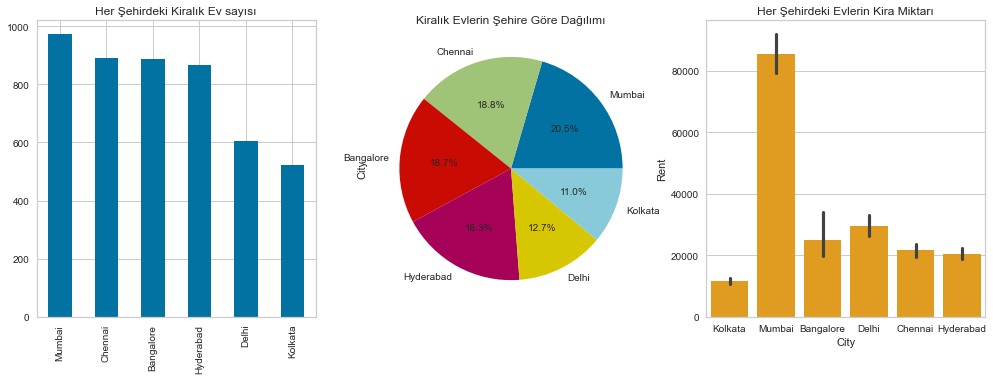

In [18]:
plt.figure(figsize= (17,12))
plt.subplot(2,3,1)
plt.title("Her Şehirdeki Kiralık Ev sayısı")
df["City"].value_counts().plot(kind = "bar");

plt.subplot(2,3,2)
plt.title("Kiralık Evlerin Şehire Göre Dağılımı")
df["City"].value_counts().plot(kind = "pie",  autopct = '%1.1f%%');

plt.subplot(2,3,3)
plt.title("Her Şehirdeki Evlerin Kira Miktarı")
sns.barplot(x="City", y="Rent",color="Orange" , data=df);

plt.show()

In [19]:
df['Furnishing Status'].value_counts()

Semi-Furnished    2251
Unfurnished       1815
Furnished          680
Name: Furnishing Status, dtype: int64

In [20]:
df['Tenant Preferred'].value_counts()

Bachelors/Family    3444
Bachelors            830
Family               472
Name: Tenant Preferred, dtype: int64

In [21]:
df['Bathroom'].value_counts()

2     2291
1     1474
3      749
4      156
5       60
6       12
7        3
10       1
Name: Bathroom, dtype: int64

In [22]:
df['Point of Contact'].value_counts()

Contact Owner      3216
Contact Agent      1529
Contact Builder       1
Name: Point of Contact, dtype: int64

In [23]:
df["Area Type"] = df["Area Type"].map({"Super Area": 1, 
                                           "Carpet Area": 2, 
                                           "Built Area": 3})
df["City"] = df["City"].map({"Mumbai": 4000, "Chennai": 6000, 
                                 "Bangalore": 5600, "Hyderabad": 5000, 
                                 "Delhi": 1100, "Kolkata": 7000})
df["Furnishing Status"] = df["Furnishing Status"].map({"Unfurnished": 0, 
                                                           "Semi-Furnished": 1, 
                                                           "Furnished": 2})
df["Tenant Preferred"] = df["Tenant Preferred"].map({"Bachelors/Family": 2, 
                                                         "Bachelors": 1, 
                                                         "Family": 3})

In [24]:
df["Floor"]=df["Floor"].str.replace("Ground out of 2","0 out 0f 2")

In [25]:
df

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Year,Month,Weekday,Month_Name,Weekday_Name
0,2,10000,1100,0 out 0f 2,1,Bandel,7000,0,2,2,Contact Owner,2022,5,2,May,Wednesday
1,2,20000,800,1 out of 3,1,"Phool Bagan, Kankurgachi",7000,1,2,1,Contact Owner,2022,5,4,May,Friday
2,2,17000,1000,1 out of 3,1,Salt Lake City Sector 2,7000,1,2,1,Contact Owner,2022,5,0,May,Monday
3,2,10000,800,1 out of 2,1,Dumdum Park,7000,0,2,1,Contact Owner,2022,7,0,July,Monday
4,2,7500,850,1 out of 2,2,South Dum Dum,7000,0,1,1,Contact Owner,2022,5,0,May,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,3 out of 5,2,Bandam Kommu,5000,1,2,2,Contact Owner,2022,5,2,May,Wednesday
4742,3,29000,2000,1 out of 4,1,"Manikonda, Hyderabad",5000,1,2,3,Contact Owner,2022,5,6,May,Sunday
4743,3,35000,1750,3 out of 5,2,"Himayath Nagar, NH 7",5000,1,2,3,Contact Agent,2022,7,6,July,Sunday
4744,3,45000,1500,23 out of 34,2,Gachibowli,5000,1,3,2,Contact Agent,2022,7,2,July,Wednesday


In [26]:
df["BHK"]=df["BHK"]**2
df["Bathroom"]=df["Bathroom"]**2

In [25]:
x,y=df.drop('Rent',axis=1),df[['Rent']]

In [27]:
setup(data=df,target="Rent")

,Description,Value
0,Session id,6336
1,Target,Rent
2,Target type,Regression
3,Original data shape,"(4746, 16)"
4,Transformed data shape,"(4746, 718)"
5,Transformed train set shape,"(3322, 718)"
6,Transformed test set shape,"(1424, 718)"
7,Ordinal features,1
8,Numeric features,10
9,Categorical features,5


In [28]:
best_model=compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,11514.9895,1051204849.3722,31010.2823,0.7038,0.4254,0.3832,5.7700
gbr,Gradient Boosting Regressor,11903.5215,1068480445.7130,31419.9358,0.6927,0.4407,0.3975,1.2800
et,Extra Trees Regressor,12227.3636,1264072541.7751,34226.6517,0.6334,0.4398,0.3919,9.1850
llar,Lasso Least Angle Regression,18508.9642,1762728553.9432,40460.2579,0.5003,0.8200,0.7913,0.2860
lr,Linear Regression,18730.1942,1762208587.0997,40469.3370,0.4999,0.8794,0.8173,1.1620
lasso,Lasso Regression,18728.9269,1762205630.2303,40469.2407,0.4999,0.8761,0.8172,1.1610
ridge,Ridge Regression,18728.9593,1762249034.5611,40469.8403,0.4999,0.8766,0.8172,0.2040
omp,Orthogonal Matching Pursuit,18730.1942,1762208587.0891,40469.3370,0.4999,0.8794,0.8173,0.2310
br,Bayesian Ridge,18675.3023,1768130349.2921,40544.0446,0.4978,0.8696,0.8129,0.5670
en,Elastic Net,18993.9145,1816273289.7340,41143.3415,0.4820,0.8073,0.8194,1.5060


Processing:   0%|          | 0/77 [00:00<?, ?it/s]